Visualizing image: IMG_20220611_094435_jpg.rf.69d90afd58ebe6296d396a940da761ca.jpg with 2 annotations from 'train' set


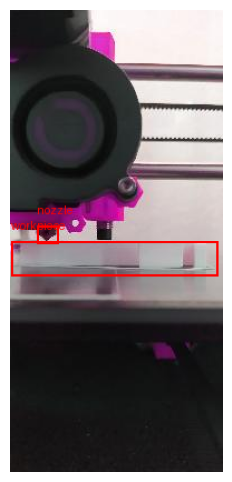

Visualizing image: IMG_20221105_123126_jpg.rf.e1a332a556ffd70f946879f87a8a7df0.jpg with 2 annotations from 'train' set


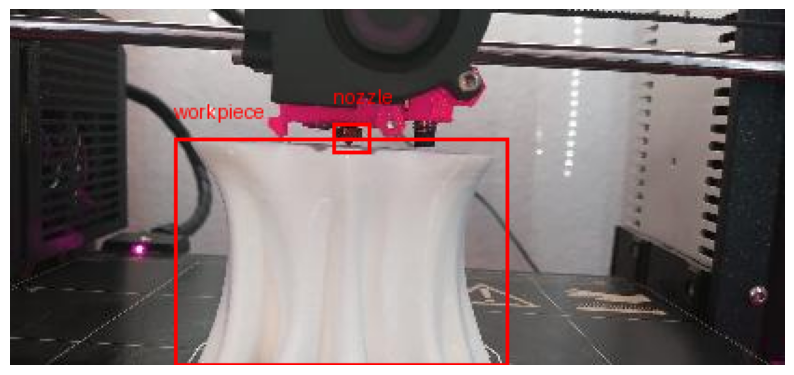

Visualizing image: IMG_20221105_111952_jpg.rf.24b96f9dea5e16ed86b92fa3e2ff4849.jpg with 2 annotations from 'train' set


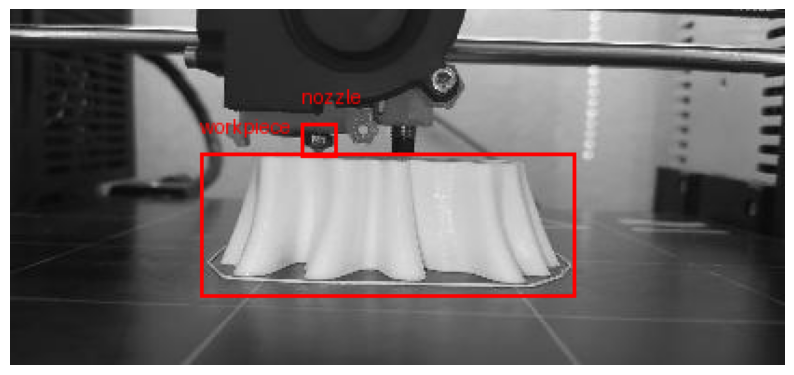

Visualizing image: IMG_20221105_152541_jpg.rf.992e0513b7d629e9453b21bfc9a7e9cf.jpg with 2 annotations from 'train' set


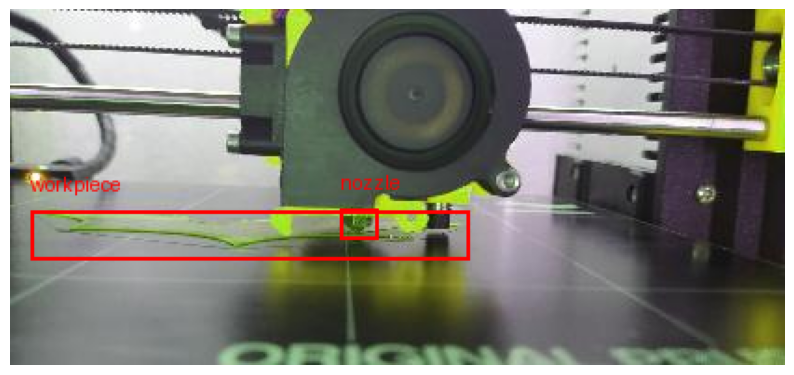

Visualizing image: IMG_20221105_150632_jpg.rf.084ce2f83486781ec3ecc5055882f5a7.jpg with 2 annotations from 'train' set


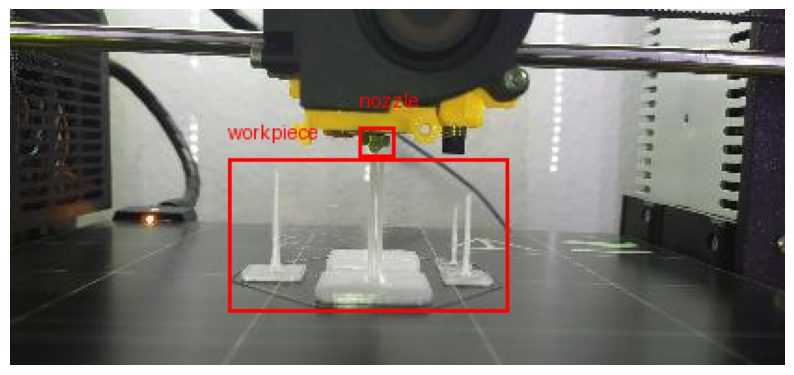

Visualizing image: IMG_20220611_094419_jpg.rf.a4552898d917e0129eab0466ad79d7f6.jpg with 2 annotations from 'train' set


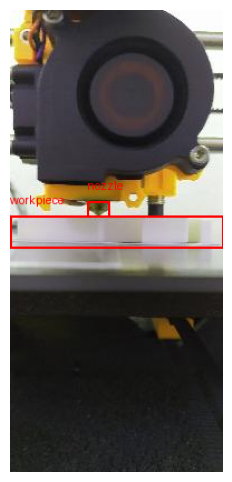

Visualizing image: IMG_20221018_191434_jpg.rf.f4fd34392f38d9928de03eba3df662b2.jpg with 2 annotations from 'train' set


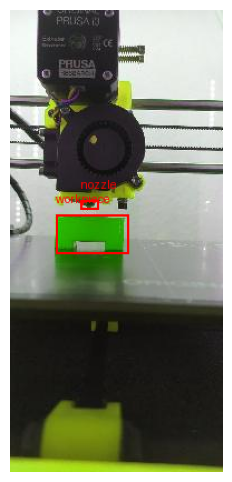

Visualizing image: IMG_20220611_094417_jpg.rf.307910addeeb1879c3473bcf19806b55.jpg with 2 annotations from 'train' set


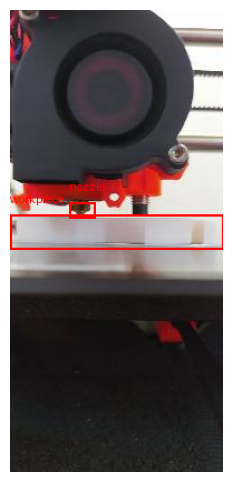

Visualizing image: IMG_20221105_123214_jpg.rf.299a7c123e4d682f08044d99c79ad3d5.jpg with 2 annotations from 'train' set


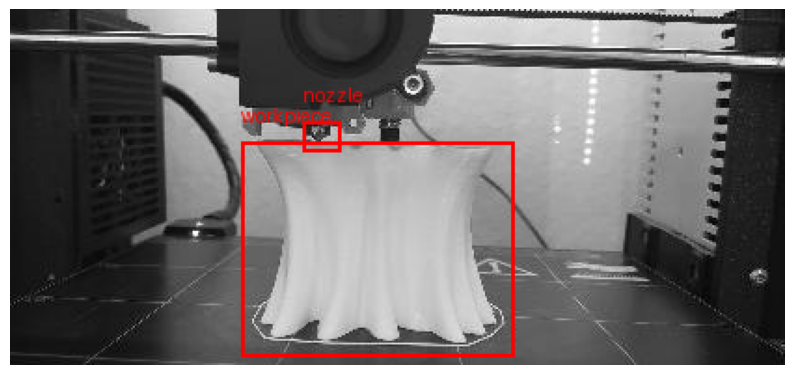

Visualizing image: IMG_20221105_150653_jpg.rf.b5bd2b40191ee4e42bf21e1ddbd995f2.jpg with 2 annotations from 'train' set


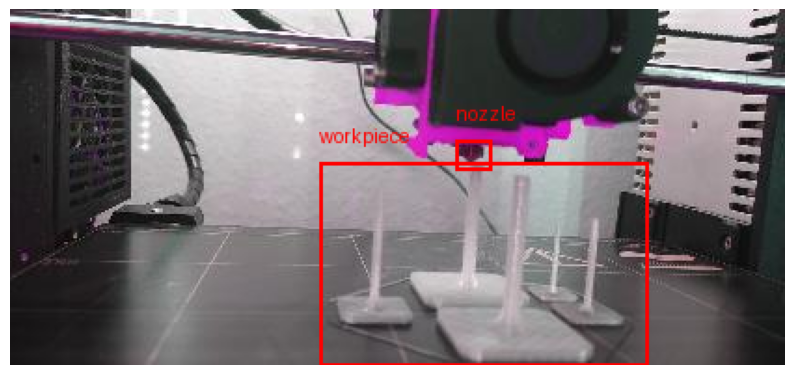

Visualizing image: IMG_20221105_111948_jpg.rf.4902566cd73aa2b327e4781a0f3bebcd.jpg with 2 annotations from 'valid' set


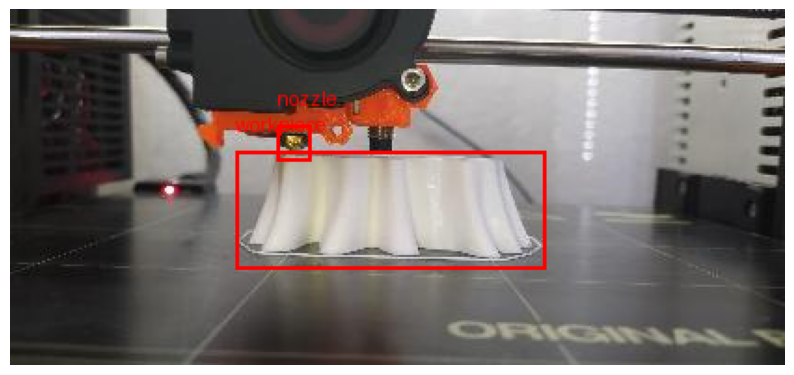

Visualizing image: IMG_20221105_160956_jpg.rf.ce47210e9a690ef9cd09f065bc3def3e.jpg with 2 annotations from 'valid' set


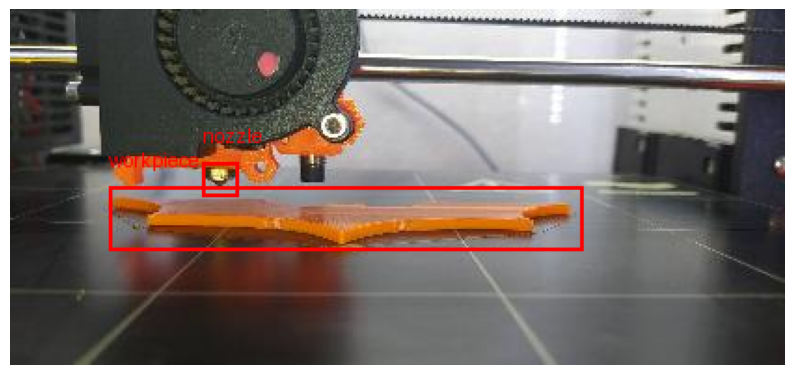

Visualizing image: IMG_20221105_123140_jpg.rf.2f5987caa2e5d3cb80a537f72de7ffbb.jpg with 2 annotations from 'valid' set


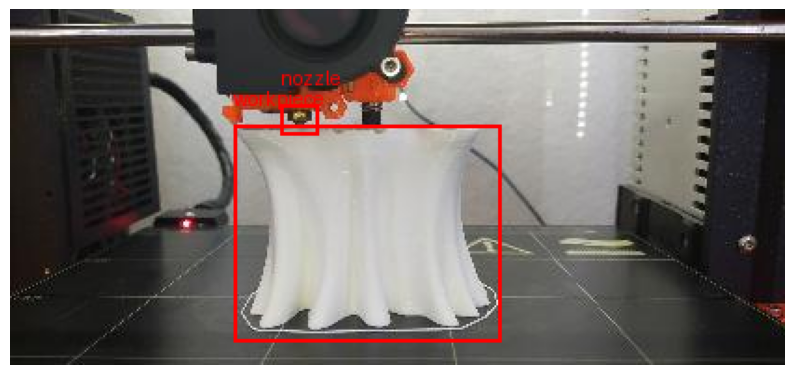

Visualizing image: IMG_20221105_111950_jpg.rf.0d640c3918605a89c116a569527d30c4.jpg with 2 annotations from 'valid' set


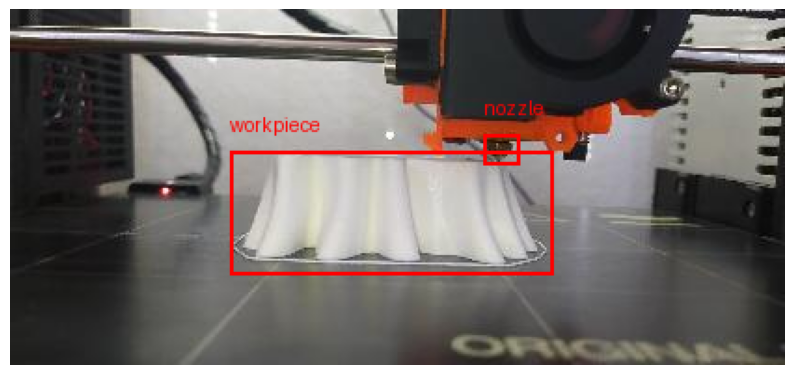

Visualizing image: IMG_20221105_160846_jpg.rf.06f25ff5b86c9e49ce6ab28eacc22bb0.jpg with 2 annotations from 'valid' set


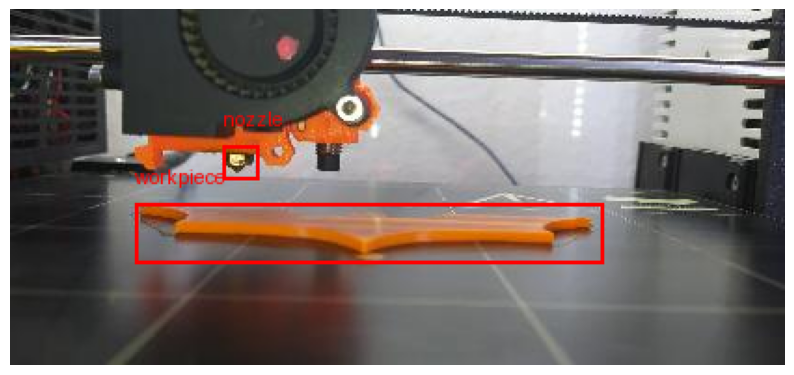

Visualizing image: IMG_20221105_111957_jpg.rf.f4954b6ae690c6fd18e2c76c2895cdad.jpg with 2 annotations from 'valid' set


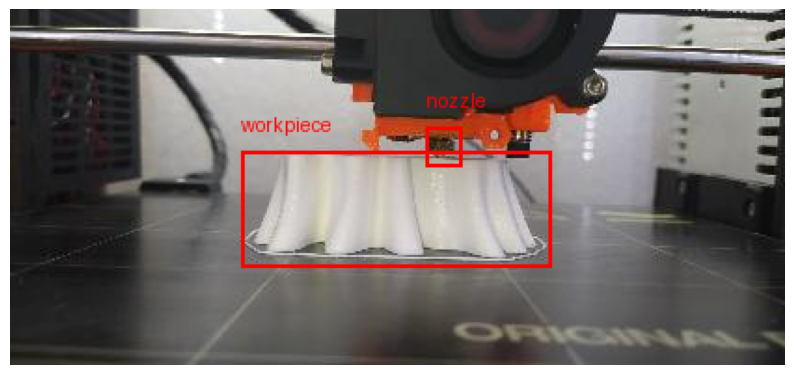

Visualizing image: IMG_20221105_150625_jpg.rf.1c72b6112e7bc0bd31d23640102ae69a.jpg with 2 annotations from 'valid' set


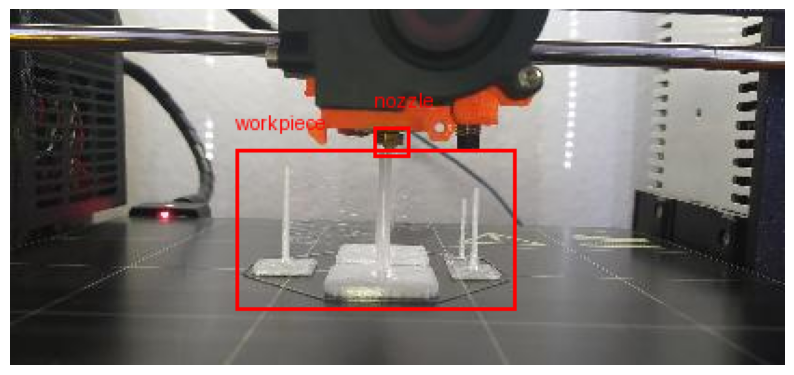

Visualizing image: IMG_20221105_160910_jpg.rf.26004cc5d4ea49dbae190e73fe97ab6a.jpg with 2 annotations from 'valid' set


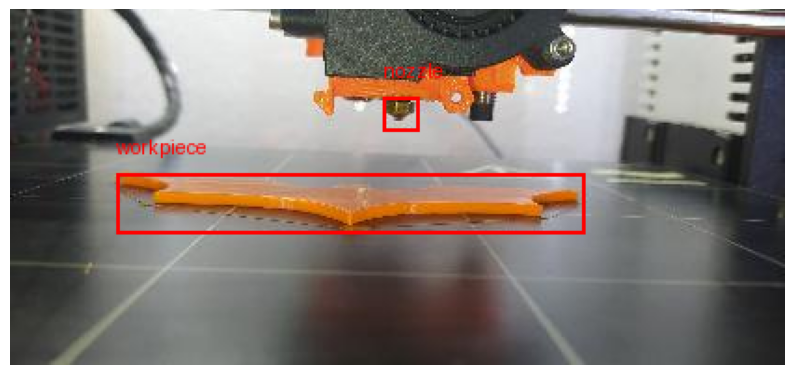

Visualizing image: IMG_20221018_122138_jpg.rf.8e52ec94a32e2d2c354d934a639f22f2.jpg with 2 annotations from 'valid' set


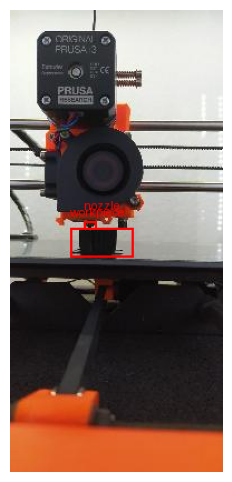

Visualizing image: IMG_20221105_123144_jpg.rf.200830f0c5a215fc804b7ec7fbd6f1e3.jpg with 2 annotations from 'valid' set


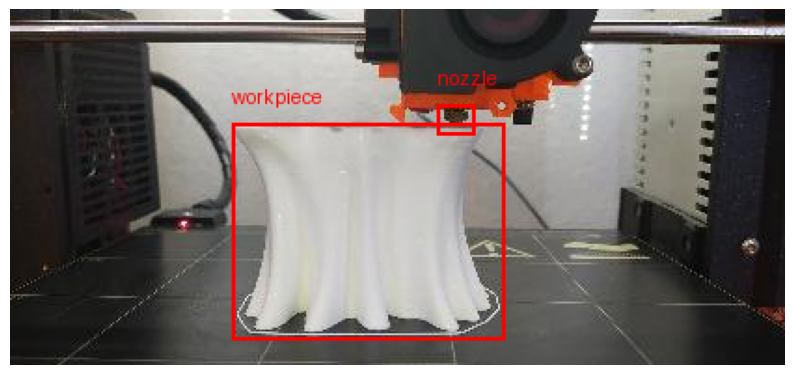

Visualizing image: IMG_20220611_094457_jpg.rf.f4e947cbe49d3eb5f7b2bf03bc91958b.jpg with 2 annotations from 'test' set


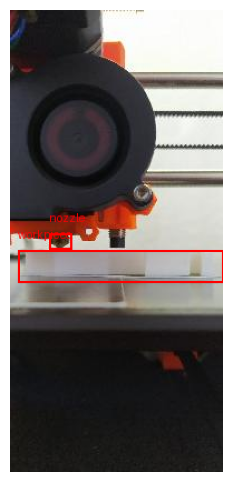

Visualizing image: IMG_20221105_112008_jpg.rf.46f543e5aa20ddf35f83611ec80b2013.jpg with 2 annotations from 'test' set


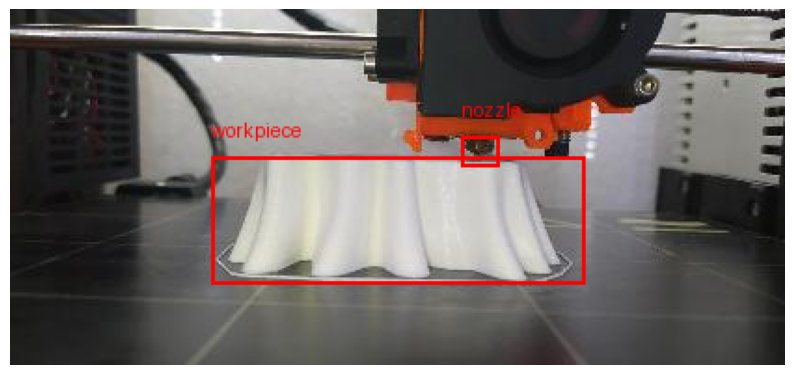

Visualizing image: IMG_20220611_094417_jpg.rf.d58407dab1fed26fbba3cad5b162e4dd.jpg with 2 annotations from 'test' set


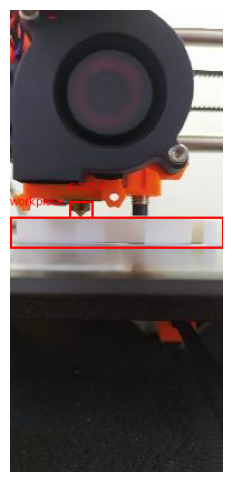

Visualizing image: IMG_20221018_191501_jpg.rf.f40507506498abdf9fb6e913d21d65f9.jpg with 2 annotations from 'test' set


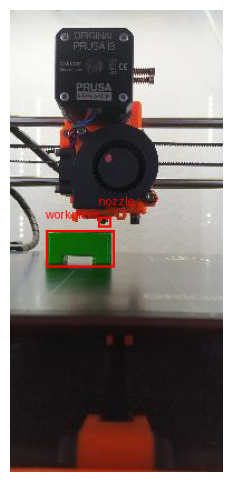

Visualizing image: IMG_20221105_123218_jpg.rf.a3f0eb7832d6f7e02c899e7e66eea615.jpg with 2 annotations from 'test' set


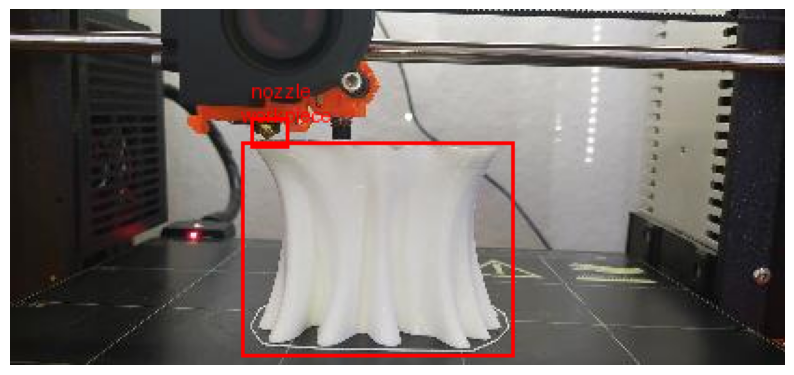

Visualizing image: IMG_20221105_112010_jpg.rf.35f1b63ffcd371745003c7d51f4cab89.jpg with 2 annotations from 'test' set


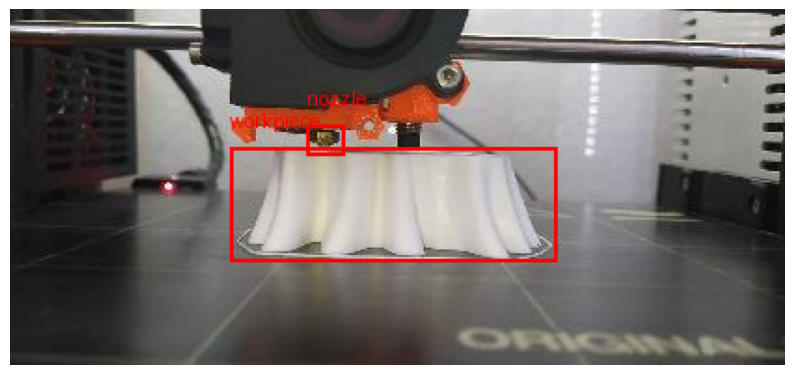

Visualizing image: IMG_20221105_160942_jpg.rf.20edf04cd4be626621584e17386239c6.jpg with 2 annotations from 'test' set


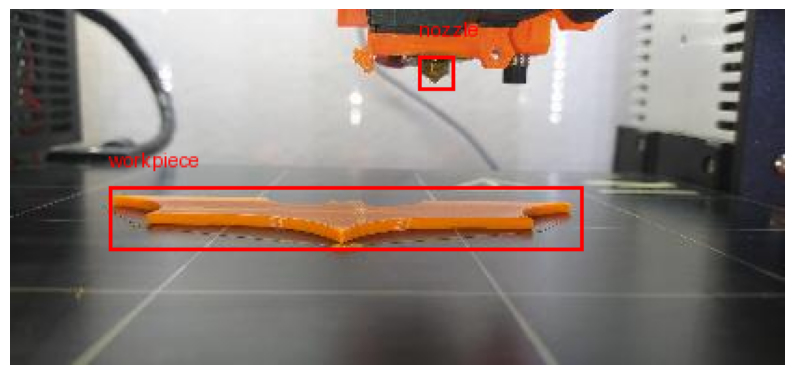

Visualizing image: IMG_20221018_191710_jpg.rf.c00f8ea6ddcb4349e523901765212958.jpg with 2 annotations from 'test' set


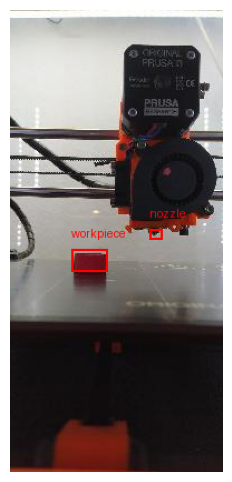

Visualizing image: IMG_20221105_160929_jpg.rf.5ccc2a55556d6c50b12559e4e6373513.jpg with 2 annotations from 'test' set


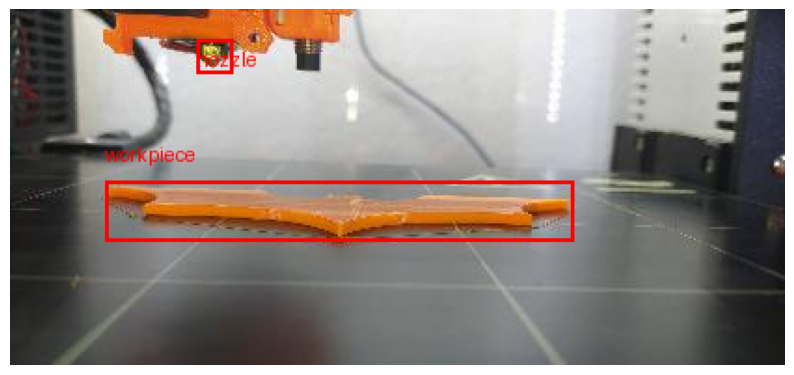

Visualizing image: IMG_20221105_150619_jpg.rf.3f72a40c99058d7b4166b5071e54faa6.jpg with 2 annotations from 'test' set


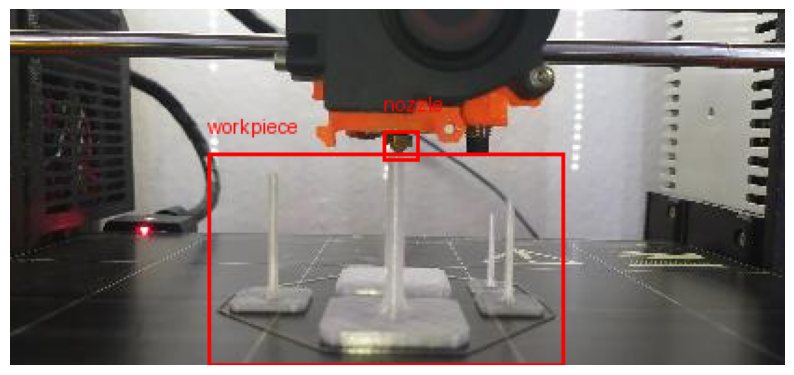

In [8]:
import json
import os
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from collections import defaultdict

def load_coco_dataset(base_dir, split):
    """
    Loads COCO annotations and image metadata for the specified dataset split.
    """
    images_dir = os.path.join(base_dir, split)
    annotation_file = os.path.join(images_dir, '_annotations.coco.json')

    with open(annotation_file, 'r') as f:
        coco = json.load(f)

    images = {img['id']: img for img in coco['images']}
    categories = {cat['id']: cat['name'] for cat in coco['categories']}
    anns_per_image = defaultdict(list)
    for ann in coco['annotations']:
        anns_per_image[ann['image_id']].append(ann)

    return images, categories, anns_per_image, images_dir

def visualize_image(image_info, anns, categories, images_dir):
    img_path = os.path.join(images_dir, image_info['file_name'])
    img = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", 18)
    except:
        font = ImageFont.load_default()

    for ann in anns:
        bbox = ann['bbox']  # [x, y, width, height]
        cat = categories[ann['category_id']]
        x, y, w, h = bbox
        draw.rectangle([x, y, x+w, y+h], outline='red', width=2)
        draw.text((x, y-20 if y-20 > 0 else y+5), cat, fill='red', font=font)

    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def visualize_random_samples(base_dir, split='train', num_samples=5):
    images, categories, anns_per_image, images_dir = load_coco_dataset(base_dir, split)
    image_ids = list(images.keys())
    sampled_ids = random.sample(image_ids, min(num_samples, len(image_ids)))

    for image_id in sampled_ids:
        image_info = images[image_id]
        anns = anns_per_image[image_id]
        print(f"Visualizing image: {image_info['file_name']} with {len(anns)} annotations from '{split}' set")
        visualize_image(image_info, anns, categories, images_dir)

BASE_DIR = '/content/sample_data/dataset_base_path'


visualize_random_samples(BASE_DIR, split='train', num_samples=10)
visualize_random_samples(BASE_DIR, split='valid', num_samples=10)
visualize_random_samples(BASE_DIR, split='test', num_samples=10)
